# Working Notebook for creating wndchrm features

## Step 1
### Load nessecary modules

In [2]:
# Add python modules

import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
fe = simr.fe
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
fe.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
FE: Hi!  You're in Matthew's module for extracting feature values from images.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [3]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'zoo_0',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Starting score parameters '
            'file for '
            '587722984435351614',
 'imgArg': {'comment': 'Starting image '
                       'parameters for '
                       '587722984435351614',
            'galaxy_centers': {'px': 513,
                               'py': 514,
                               'sx': 309,
                               'sy': 608},
            'image_size': {'height': 1024,
                           'width': 1024},
            'name': 'zoo_0'},
 'name': 'zoo_0',
 'scoreType': 'model_fitness_score',
 'simArg': {'nPts': '100k',
            'name': '100k'}}


Text(0.5, 1.0, 'Starting Target Image')

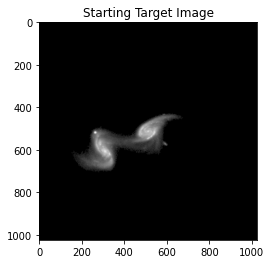

In [4]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")



In [ ]:
# Create a starting WNDCHRM feature normalization.

norm_wndchrm_all_test = {}
norm_wndchrm_all_test['name'] = 'norm_wndchrm_0'
norm_wndchrm_all_test['top_models'] = 500
norm_wndchrm_all_test['image_group'] = 'chime_0'
norm_wndchrm_all_test['normalization_method'] = 'sklearn_StandardScaler'



___
## Step 4: Create a new image parameter


In [4]:
# Create a blank group score parameter and copy starting parameters
newName = 'chime_test_param'
newImgName = 'chime_test_image_2'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['comment'] = 'Developing initial WNDCHRM implementation'
new_params[newName]['imgArg']['name'] = newImgName
new_params[newName]['imgArg']['type'] = 'wndchrm'

# Leave a comment if its for a specific experiment
cmt = 'Developing the creation process for new wndchrm photos'
new_params[newName]['imgArg']['comment'] = cmt

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 100
new_params[newName]['imgArg']['image_size']['height'] = 100

# If you want to change the galaxy centers
# Primary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['px'] = 33
new_params[newName]['imgArg']['galaxy_centers']['py'] = 50
# Secondary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['sx'] = 67
new_params[newName]['imgArg']['galaxy_centers']['sy'] = 50
# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
new_params[newName]['cmpArg']['targetName'] = newImgName


# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = .5


# If you want to modify the radial brightness constant
pc = 1.5    # primary galaxy
sc = 1.5     #secondary galaxy
new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5

new_params[newName]['featArg'] = {}
new_params[newName]['featArg']['type'] = 'wndchrm_all'
new_params[newName]['featArg']['normalization'] = None
new_params[newName]['featArg']['name'] = 'chime_test'

#gm.pprint(new_params)


IC: Adusting Starting Target Image

	 - From points:
[[513. 514.]
 [309. 608.]
 [607. 718.]]
	 - To points:
[[33. 50.]
 [67. 50.]
 [33. 16.]]
	 - Warp Matrix
[[-1.37477206e-01  6.33473400e-02  7.09652739e+01]
 [-6.33473400e-02 -1.37477206e-01  1.53160469e+02]]
	 - Writing to loc: /home/mbo2d/587722984435351614/information/target_images/target_chime_test_image_2.png
	 - File should exist: /home/mbo2d/587722984435351614/information/target_images/target_chime_test_image_2.png


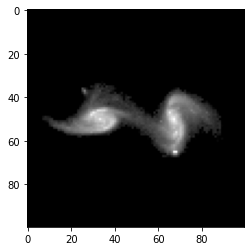

In [16]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Create and return new target image
tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True, printAll = True )

tImg2 = tInfo.getTargetImage( newImgName, overwrite=True )

tInfo.saveWndchrmImage( tImg, newImgName )

if type(tImg2) != type(None):
    plt.imshow( gm.float32_to_uint8(tImg2), cmap='gray')

else:
    print("WARNING!  Target image not found")

In [6]:
from os import listdir
newLoc = './../param/chime_test.json'
gm.saveJson( new_params, newLoc)
tmp = gm.readJson( newLoc )
#gm.pprint(tmp)

In [7]:
rArg = gm.inArgClass()
rArg.printAll = True
rArg.setArg( 'rInfo', rInfo )
rArg.setArg( 'newImage', True )
rArg.setArg( 'newFeats', True )
#rArg.setArg( 'newScore', True )
rArg.setArg( 'paramLoc', newLoc )
#rArg.setArg( 'overWrite', True )

simr.simr_run( arg=rArg, rInfo=rInfo)

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd0a077eeb0>
IC: image_creator_run
IC: rInfo.status:  True
IC: given parameters: 1
IC:  chime_test_image_2
IC: Creating image:
	 - runId: run_0000
	 - score: chime_test_param
IC: Image 'chime_test_image_2' already made for run_0000
IC_LOOP:    1 /    1: COMPLETE
FE: image_creator_run
FE: rInfo.status:  True
FE: given parameters: 1
FE: name/type: chime_test_param/wndchrm_all
FE: wndchrm_all: Notebook development
FE: wndchrm_all: Executing:
	 - $ wndchrm train -s /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/wndchrm_files/ /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/wndchrm_files/wndchrm_all.fit
FE: wndchrm_all: Execution Done
	 - Collecting wndchrm all data
FE: collect_wndchrm_data
	 - number of features: 1059
	 - number of images: 49
	 - feature labels head: [ Chebyshev-Fourier

In [8]:
def plot_images( rInfo, group_param, nCol = 3 ):
    from math import ceil
    
    i = 0
    j = 0
    n = len( group_param )
    nRow = ceil( n / nCol )
    if nRow < 2:
        nRow = 2
    
    fig, ax = plt.subplots( nRow, nCol ,figsize=(nCol*4,nRow*4) )
    
    for pKey in group_param:
        
        imgName = group_param[pKey]['imgArg']['name']
        
        ax[i,j].set_title(imgName)
        img = rInfo.getModelImage( imgName, overWrite = True, toType = np.uint8)
        if type(img) == type(None):
            print("image warning: None")
        elif img.dtype != np.uint8:
            print("img warning:",img.dtype)
        else:
            ax[i,j].imshow( img, cmap='gray' )
        
        j += 1
        if j >= nCol:
            j = 0
            i += 1
    
    

dict_keys(['chime_0', 'chime_1', 'chime_2', 'chime_3', 'chime_4', 'chime_5', 'chime_6', 'chime_7', 'chime_8', 'chime_9', 'chime_10', 'chime_11', 'chime_12', 'chime_13', 'chime_14', 'chime_15', 'chime_16', 'chime_17', 'chime_18', 'chime_19', 'chime_20', 'chime_21', 'chime_22', 'chime_23', 'chime_24', 'chime_25', 'chime_26', 'chime_27', 'chime_28', 'chime_29', 'chime_30', 'chime_31', 'chime_32', 'chime_33', 'chime_34', 'chime_35', 'chime_36', 'chime_37', 'chime_38', 'chime_39', 'chime_40', 'chime_41', 'chime_42', 'chime_43', 'chime_44', 'chime_45', 'chime_46', 'chime_47'])
SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fd0a077eeb0>
IC: image_creator_run
IC: rInfo.status:  True
IC_LOOP:   48 /   48: COMPLETE
FE: image_creator_run
FE: rInfo.status:  True
FE_LOOP:   1 /   1 COMPLETE!


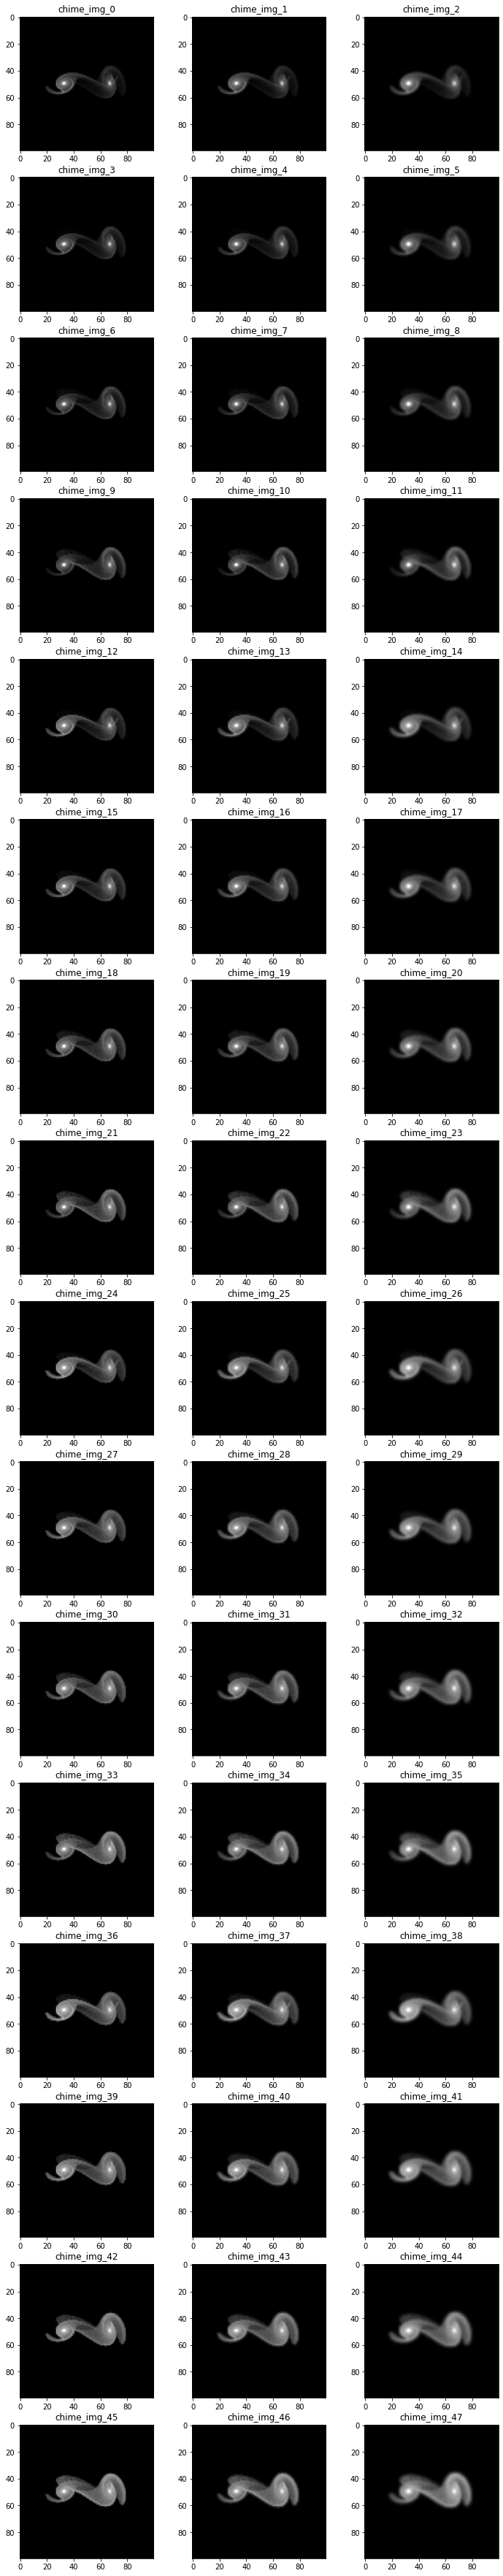

In [9]:
# Create many model images

chime_group_1 = {}
i = 0

for x in np.linspace( 1.5, 3, 4 ):
    #x = 2

    for y in np.linspace( -1.5, 2.5, 4):
    #y = 0.5


        for a in np.linspace( 0.1, 0.7, 3 ):
        #a = 0.3

            #print(x, y, z, a)
            chime_group_1['chime_%d'%i] = deepcopy( new_params['chime_test_param'] )
            chime_group_1['chime_%d'%i]['imgArg']['name'] = 'chime_img_%d' % i
            chime_group_1['chime_%d'%i]['imgArg']['normalization']['type'] = 'type1'
            chime_group_1['chime_%d'%i]['imgArg']['normalization']['norm_constant'] = x

            chime_group_1['chime_%d'%i]['imgArg']['radial_const'][0] = y
            chime_group_1['chime_%d'%i]['imgArg']['radial_const'][1] = -y

            chime_group_1['chime_%d'%i]['imgArg']['blur']['size'] = 13    
            chime_group_1['chime_%d'%i]['imgArg']['blur']['weight'] = a
            
            chime_group_1['chime_%d'%i]['featArg']['normalization'] = None
            chime_group_1['chime_%d'%i]['featArg']['name'] = 'chime_group_test'

            i += 1

#gm.pprint( new_params['chime_test_param'] )
gm.pprint(chime_group_1.keys())

rArg = gm.inArgClass()
#rArg.printAll = True
rArg.setArg( 'rInfo', rInfo )
rArg.setArg( 'newImage', True )
rArg.setArg( 'newFeats', True )
#rArg.setArg( 'newScore', True )
rArg.setArg( 'scoreParams', chime_group_1 )
#rArg.setArg( 'overWrite', True )

simr.simr_run( arg=rArg, rInfo=rInfo)

plot_images( rInfo, chime_group_1 )


In [10]:
from os import listdir
newLoc = './../param/chime_group_1.json'
gm.saveJson( chime_group_1, newLoc)
tmp = gm.readJson( newLoc )
#gm.pprint(tmp['chime_1'])

In [11]:
# Have Target collect wndchrm values and collect into one file

norm_wndchrm_all_test = {}
norm_wndchrm_all_test['name'] = 'norm_wndchrm_all_test'
norm_wndchrm_all_test['top_models'] = 500
norm_wndchrm_all_test['type'] = 'wndchrm_all'
norm_wndchrm_all_test['image_group'] = 'chime_group_1'
norm_wndchrm_all_test['normalization_method'] = 'sklearn_StandardScaler'

normLoc = '../param/' + norm_wndchrm_all_test['name'] + '.json'
gm.saveJson( norm_wndchrm_all_test, normLoc )
gm.pprint(norm_wndchrm_all_test)

{'image_group': 'chime_group_1',
 'name': 'norm_wndchrm_all_test',
 'normalization_method': 'sklearn_StandardScaler',
 'top_models': 500,
 'type': 'wndchrm_all'}


In [12]:
tArgNormTest = gm.inArgClass()
tArgNormTest.setArg( 'printAll', True )
tArgNormTest.setArg( 'normFeats', True )
tArgNormTest.setArg( 'normLoc', normLoc )
tArgNormTest.setArg( 'normParam', norm_wndchrm_all_test )

simr.simr_target( tArgNormTest, tInfo )

SIMR: simr_target: input
	 - tDir: None
	 - tInfo: <class 'Support_Code.info_module.target_info_class'>
SIMR: target: True - 587722984435351614 - 1293 Models


In [13]:

def target_collect_wndchrm_all( args, tInfo ):
    
    printAll = args.printAll
    printBase = args.printBase
    
    if printBase: print("FE: target_collect_wndchrm_all")
        
    runDirList = tInfo.iter_runs( n = 10 )
    for rDir in runDirList:
        print(rDir)
    
target_collect_wndchrm_all( tArgNormTest, tInfo )

FE: target_collect_wndchrm_all
/home/mbo2d/587722984435351614/zoo_merger_models/run_0000/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0001/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0002/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0003/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0004/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0005/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0006/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0007/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0008/
/home/mbo2d/587722984435351614/zoo_merger_models/run_0009/


In [14]:

# Function to collect model wndchrm values and normalize them.
def normalize_target_wndchrm( args, tInfo, normDict ):
    
    printAll = args.printAll
    printBase = args.printBase
    
    if printBase:
        print( "FE: normalize_target_wnchrm." )
        gm.tabprint( "tID: %s" % tInfo.get( 'target_id' ) )
        gm.tabprint( "Normalization Parameters")
        gm.pprint( normDict )


fe.normalize_target_wndchrm = normalize_target_wndchrm
fe.normalize_target_wndchrm( tArgNormTest, tInfo, norm_wndchrm_all_test )

FE: normalize_target_wnchrm.
	 - tID: 587722984435351614
	 - Normalization Parameters
{'image_group': 'chime_group_1',
 'name': 'norm_wndchrm_all_test',
 'normalization_method': 'sklearn_StandardScaler',
 'top_models': 500,
 'type': 'wndchrm_all'}


In [15]:
tInfo.printAll = True
tInfo.gatherRunInfos()
print("Done")

IM: Target.gatherRunInfos
	 - IM: gather_run_info LOOP: 1293 / 1293 COMPLETE
IM: Target.saveInfoFile():
	 - Saving target info file...
Done
